# Imports
Numpy import is to handle numpy arrays

Pandas import to handle dataframes

matplotlib import to plot the graphs

Radom import to create random samples

Axes3D of matplotlib is to draw 3D graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from mpl_toolkits.mplot3d import  Axes3D

# Reading the dataset from data
We have two datasets in this problem 
### Dataset - 1
Concreate dataset
It has 1030 instances with 9 columns
* cement
* blast_furnace_slag
* fly_ash
* water
* superplasticizer
* coarse_aggregate
* fine_aggregate
* age
* concrete_compressive_strength
[link to dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set)

### Dataset - 2
50 Starups dataset
It has 50 instances with 4 numerical columns and catogorical column
* R&D Spend
* Administration
* Marketing Spend
* State
* Profit
[link to dataset](https://www.kaggle.com/divyam811/50-startups)
> Note: For 3D visulization purpose we randomly sample 2 columns of dataset. Based on which ever dataset is required comment and un comment the codes. Based on 3D visualizations requirement comment and uncomment the codes


In [2]:
# Concrete Dataset
'''
dataset = pd.read_csv(r'..\data\Concrete_Data_Yeh.csv')
x_labels = ['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']
y_lables = ['csMPa']
x_labels_categorical = []

# Squeezed 3D data for Visualization purpose
x_labels = random.sample(x_labels,2)
y_lables = ['csMPa']
x_labels_categorical = []
'''
# 50_Startups dataset

dataset = pd.read_csv(r'..\data\50_Startups.csv')
x_labels = ['R&D Spend', 'Administration', 'Marketing Spend']
y_lables = ['Profit']
x_labels_categorical = ['State']
# Squeezed 3D data for Visualization purpose
x_labels = random.sample(x_labels,2)
y_lables = ['Profit']
x_labels_categorical = []


# Converting categorical data into one hot encoder
Line 1 : we are importing `OneHotEncoder` and `LabelEncoder` class to convert the categorical data into one hot encoding

Line 2 : creating a varible to stack all the one hot encoded columns

Line 3 : Iterating through all categorical columns one by one

Line 4 : Extracting the categorical column from the dataset

Line 5,6,7,8 : creating an instance of `LabelEncoder` class, fitting the column , transforming the column, reshaping the array for input to `OneHotEncoder`

Label encoder would assign integers to a string class
for example :
* column extracted from dataset would appear like this
```python
['New York' 'California' 'Florida' 'New York' 'Florida' 'New York'
 'California' 'Florida' 'New York' 'California' 'Florida' 'California'
 'Florida' 'California' 'Florida' 'New York' 'California' 'New York'
 'Florida' 'New York' 'California' 'New York' 'Florida' 'Florida'
 'New York' 'California' 'Florida' 'New York' 'Florida' 'New York'
 'Florida' 'New York' 'California' 'Florida' 'California' 'New York'
 'Florida' 'California' 'New York' 'California' 'California' 'Florida'
 'California' 'New York' 'California' 'New York' 'Florida' 'California'
 'New York' 'California']
```
* On applying label encoder
```python
[2 0 1 2 1 2 0 1 2 0 1 0 1 0 1 2 0 2 1 2 0 2 1 1 2 0 1 2 1 2 1 2 0 1 0 2 1
 0 2 0 0 1 0 2 0 2 1 0 2 0]
```
New York got assigned a value 2 , California got assigned a value 0 and goes on 

Line 9,10,11 : creating an instance of `OneHotEncoder` class, fitting the column , transforming the column, converting into an array with the help of `toarray()` function

One Hot encoder would convert the interger to one hot representation . One hot representaion would contain only 0 and 1. An array of class length would be created and 1 is placed based on the Integer assigned to it.
for example :
* Column after Label encoder would look like this
```python
[[2]
 [0]
 [1]
 [2]
 [1]
...
 [2]
 [0]]
```
* On applying label encoder
```python
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]]
```

In the first element of Onehot encoder is 2 and we have only three classes so an array of 3 is created and 1 is place in the 3rd positions and this array is placed as first element of one hot encoder output.

In the second element of Onehot encoder is 0, 1 is place in the 1st positions and this arrray is placed as second element of one hot encoder output. 

and goes on... 

Line 12,13,14,15 : checking if the `X_categorical_columns` have some columns if yes adding these columns parallelly to those columns if no then adding these columns directly.

In [3]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
X_categorical_columns = None
for categorical_column in x_labels_categorical:
    X_categorical = dataset[categorical_column].values.ravel()
    le = LabelEncoder()
    le.fit(X_categorical)
    X_categorical = le.transform(X_categorical)
    X_categorical = X_categorical.reshape(-1,1)
    ohe = OneHotEncoder()
    ohe.fit(X_categorical)
    X_categorical = ohe.transform(X_categorical).toarray()
    if X_categorical_columns is None:
        X_categorical_columns = X_categorical
    else:
        X_categorical_columns = np.concatenate((X_categorical_columns,X_categorical),axis=1)

# Creating Dependent and Independent variables
In Machine learnign we try to predict one values based on remaining given values. In order to do that Indepent variables are created `X`  and depedent variables are created `y`

They have been kept in numpy arrays format

In [4]:
if len(x_labels_categorical) != 0:
    X = np.concatenate((dataset[x_labels].values,X_categorical_columns),axis=1)
else:
    X = dataset[x_labels].values
    
y = dataset[y_lables].values

# Splitting the data into training set and test set
We training our model on train data and test it on Test data so, its accuracy and belief in prediction is mesured using the test data which it has never seen before

Taking 80% data as train data

Taking the remaing 20% as test data

In [5]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y, test_size = 0.8)

# Importing the linear model from sklearn framework
Line 1: Importing `LinerRegression` class of scikit learn 

Line 2: Creating instance of `LinearRegression` class and creating a lr object

Line 3: Fitting the data to the Linear Regression Object

In theory Line 3 is where all the maths happens 
* based on the number of independent variable those many coefficients are taken and instialised with random values.
* every point in the dataset is keep in the equation of linear regression and dependent variable value is caluculated.
* Loss is caluculated based on  the difference between actaul value and predicted value.
* Based on the loss coefficents values are adjusted such the for the next datapoint we would acquire minimum loss.
This process is continued for the whole dataset to obtaing optimal values for the coefficents

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Predicting the Results
A trained equation is created with optimal coefficient which would tell the dependent variable value based on the set of independent values given to the object

Making prediction on the test set to acquire `y_pred` values on test set 

In [7]:
y_pred = lr.predict(X_test)

# Visualizing the results
We are not showint the indepent varible values
Insted we are plotting the predicted values and actual values to see how good our predictions are
> Note: we are showing only 10 samples out of 100's of samples

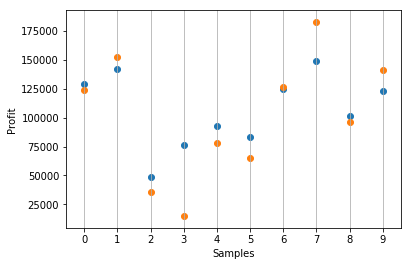

In [8]:
plt.scatter(np.arange(0,len(y_pred[:10]),1),y_pred[:10],cmap = 'Sequential')
plt.scatter(np.arange(0,len(y_test[:10]),1),y_test[:10],cmap = 'Sequential')
plt.gca().xaxis.grid(True)
plt.xticks(np.arange(0,len(y_pred[:10]),1))
plt.ylabel(y_lables[0])
plt.xlabel('Samples')
plt.show()

# 3D visualization 
By only taking 2 independent variables we are able to create 3D visualization of 
1. predicted and actual values
2. 2D plane separating the thrid dimension predicted values

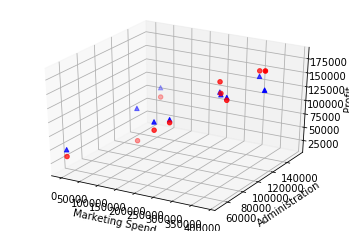

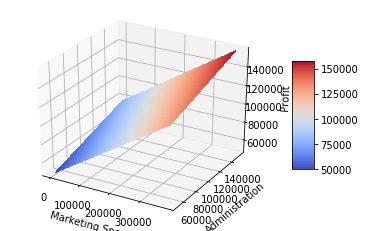

In [9]:
if len(x_labels)==2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = X_test[:,0]
    ys = X_test[:,1]
    ax.scatter(xs, ys, y_test, c='r', marker='o')
    ax.scatter(xs, ys, y_pred, c='b', marker='^')
    ax.set_xlabel(x_labels[0])
    ax.set_ylabel(x_labels[1])
    ax.set_zlabel(y_lables[0])
    plt.show()
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # Make data.
    X = np.arange(min(xs), max(xs),(max(xs)-min(xs))/100)
    Y = np.arange(min(ys), max(ys),(max(ys)-min(ys))/100)
    X, Y = np.meshgrid(X, Y)
    Z = lr.predict(np.concatenate((X.ravel().reshape(-1,1),Y.ravel().reshape(-1,1)),axis=1)).reshape(X.shape)
    
    from matplotlib import cm
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    ax.set_xlabel(x_labels[0])
    ax.set_ylabel(x_labels[1])
    ax.set_zlabel(y_lables[0])
    plt.show()